In [2]:
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import numpy as np
import pywt
import pyyawt

plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = '262629'
plt.rcParams['figure.facecolor'] = '262629'

In [3]:
# data = np.load('../datasets/raw_normalized_dataset_X.npy')
data = np.load('../features/detrend_median21.npy')

In [7]:
cA , cD = pywt.dwt(data , 'db2' ,'smooth')

In [8]:
def apply_threshold_soft(signal, threshold):
    signal = np.copy(signal)
    signal[signal<threshold] = 0
    return signal

def apply_threshold_hard(signal, threshold):
#     signal = np.copy(signal)
#     signal[signal<threshold] = 0
    return signal-threshold


In [9]:
# cD_data = pywt.idwt(None, cD, 'db2' , 'smooth')
# cA_data = pywt.idwt(cA, None,'db2' , 'smooth')
# cD_data_ = pywt.idwt(None, cD_, 'db2' , 'smooth')
# cA_data_ = pywt.idwt(cA_, None,'db2' , 'smooth')

In [1]:
def plot_series(series, title, figsize=(15, 5), xlabel=None, ylabel=None, mode='o'):
    median = np.median(series)
    std = np.std(series)
    plt.figure(figsize=figsize)
    plt.plot(series,mode, markersize=3)
#     plt.plot((median+3*std)*np.ones(len(series)), '-')
    plt.title(title)
    if xlabel: plt.xlabel(xlabel)
    if ylabel: plt.ylabel(ylabel)
    plt.show()
    
def plot_series_fft(series, title):
    plot_series(np.abs(fft(series)), "FFT "+title)

In [ ]:
i = 18
# for i in range(20):
plot_series(data[i], 'Original Data %d'%i)
plot_series(cA[i], 'cA')
plot_series(cD[i], 'cD')

# plot_series_fft(data[i], 'Original Data')
# plot_series_fft(cA[i], 'cA')
# plot_series_fft(cD[i], 'cD')


In [ ]:
apply_threshold = apply_threshold_soft
# cD_ = apply_threshold(cD, 0.05)
# cA_ = apply_threshold(cA, 0.05)
a = cA[i]
d = cD[i]

plot_series(data[i], 'original')


ad_inv = pywt.idwt(a, d, 'haar', 'smooth')
# plot_series(d, 'd component')
# plot_series(ad_inv, 'Wavelet inverse of only d component')


a_inv = pywt.idwt(a, None, 'haar', 'smooth')
plot_series(a, 'A component')
plot_series(a_inv, 'Wavelet inverse of only a component')

d_inv = pywt.idwt(None, d, 'haar', 'smooth')
plot_series(d, 'd component')
plot_series(d_inv, 'Wavelet inverse of only d component')


filtered = pywt.idwt(0.3*a, 1*d, 'haar', 'smooth')
plot_series(filtered, 'Filtered component')

# idwt = pywt.idwt(None, cD[i], 'db2', 'smooth')
# plot_series(cD_data[i], 'Wavelet inverse of cD only')

# plot_series(, 'Smoothing')
# plot_series(cA_data[i], 'Wavelet inverse of cA only')
# plot_series(cA_data_[i], 'Wavelet inverse of cA with threshold')
# plot_series(cD_data_[i], 'Wavelet inverse of cD with threshold')


Using PyYaWT package to denoising the signal using wavelets

In [107]:
pyyawt.denoising.wden??

In [114]:
def plot_2(i, j, title):
    plt.figure(figsize=(8, 8))
    ax = plt.subplot(2, 1, 1)
    plt.plot(i, 'o', markersize=2)
    plt.title(title)
    ax.set_yticklabels([])
    ax = plt.subplot(2, 1, 2)
    plt.plot(j, 'o', markersize=2)
    ax.set_yticklabels([])
    
    plt.show()


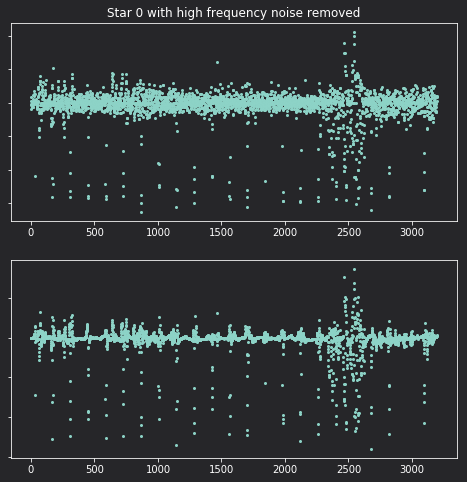

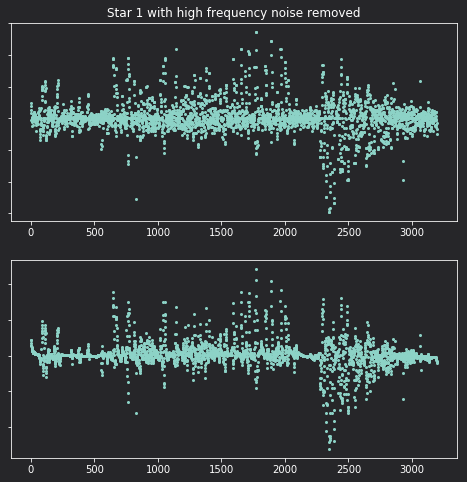

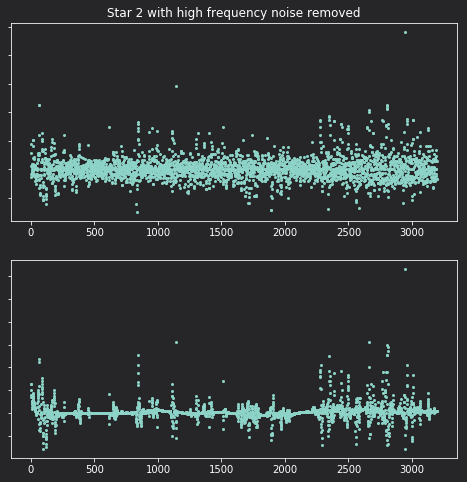

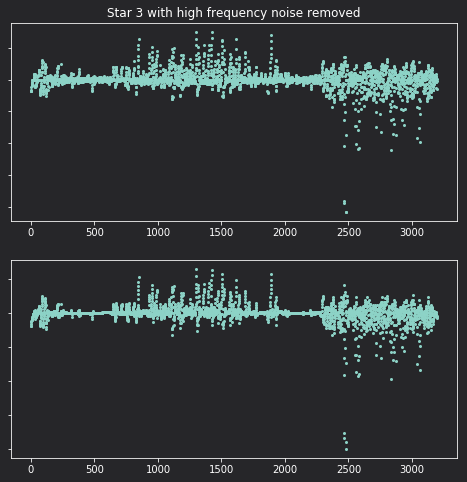

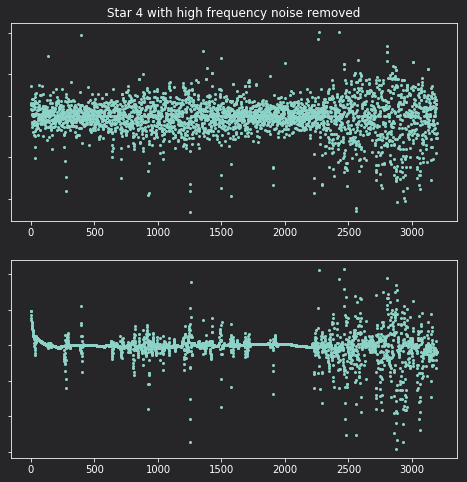

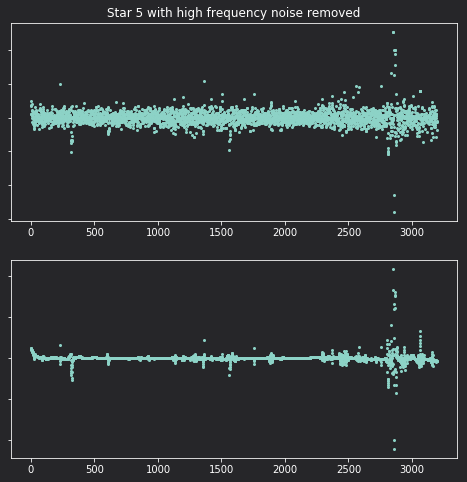

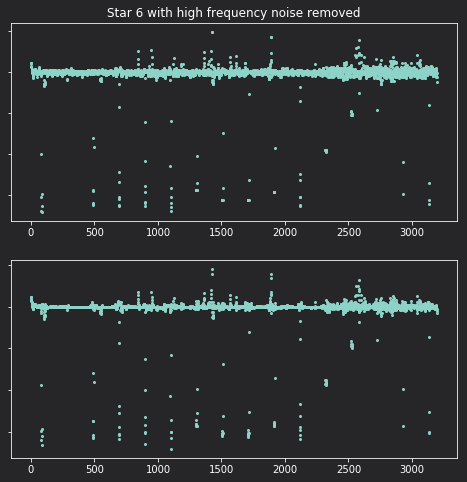

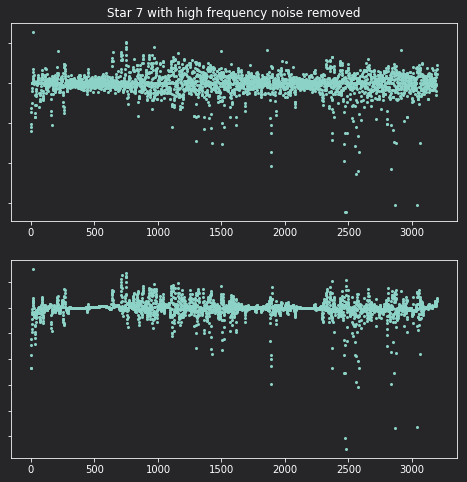

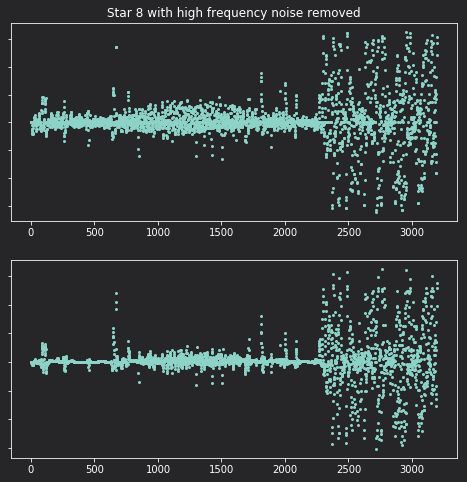

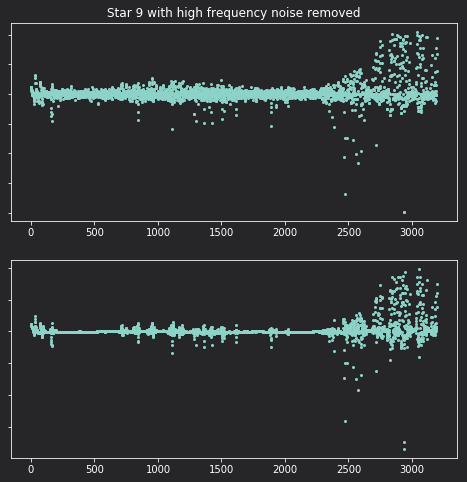

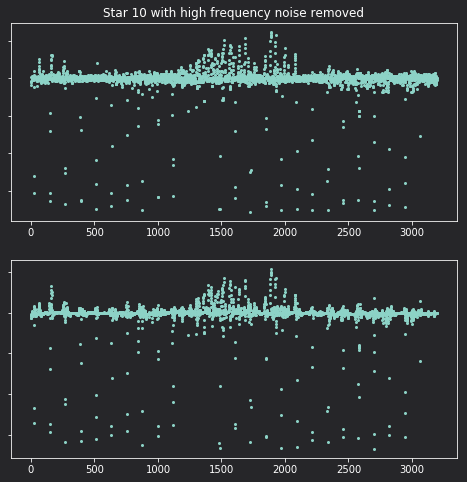

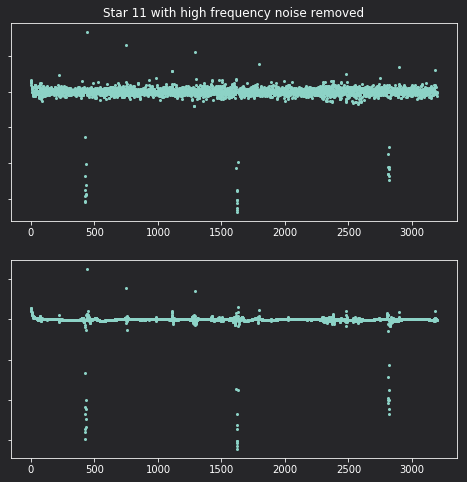

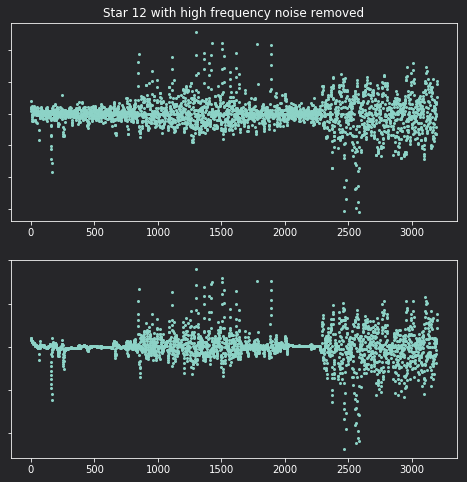

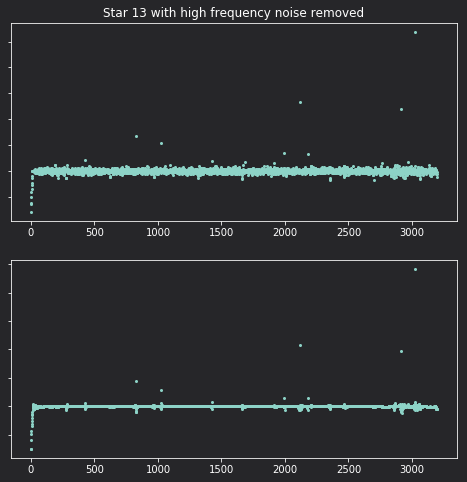

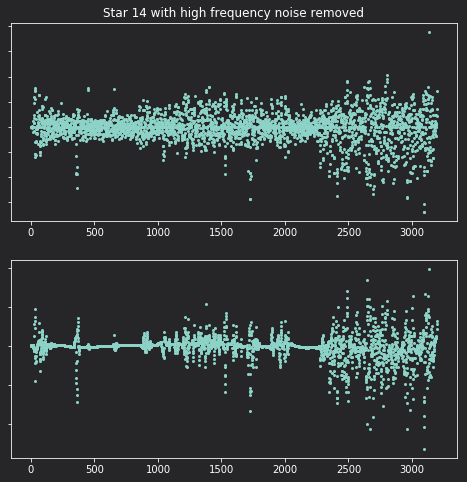

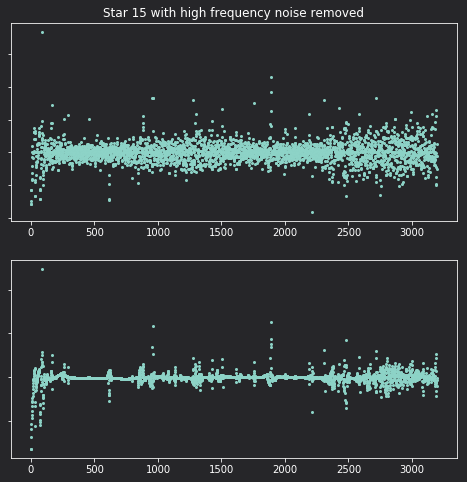

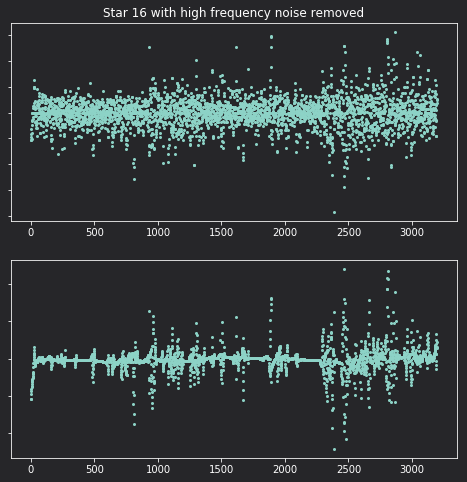

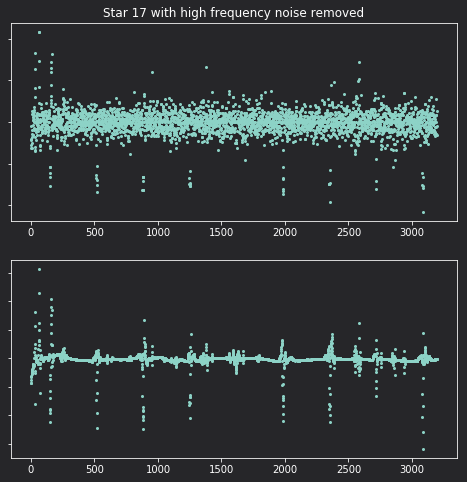

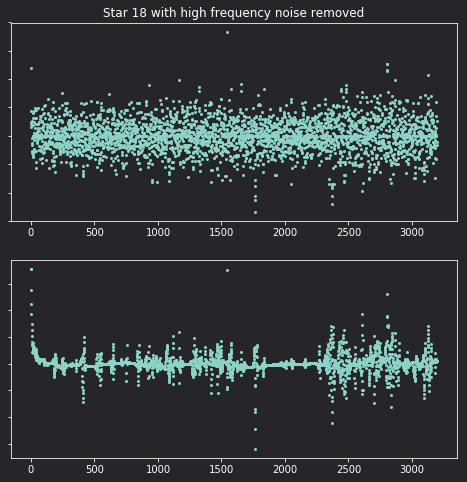

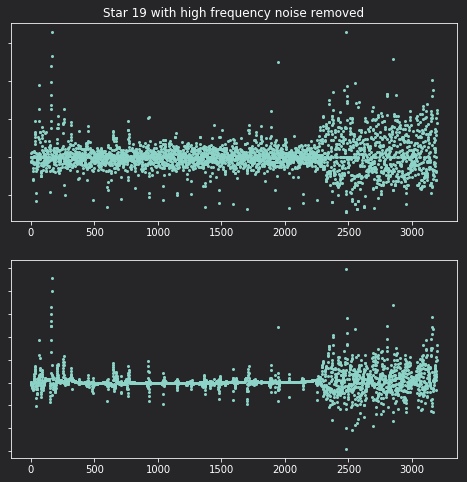

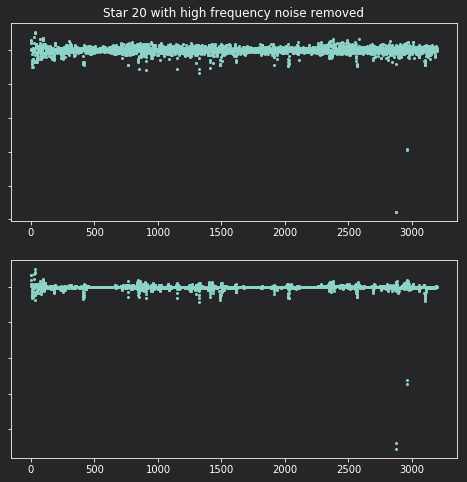

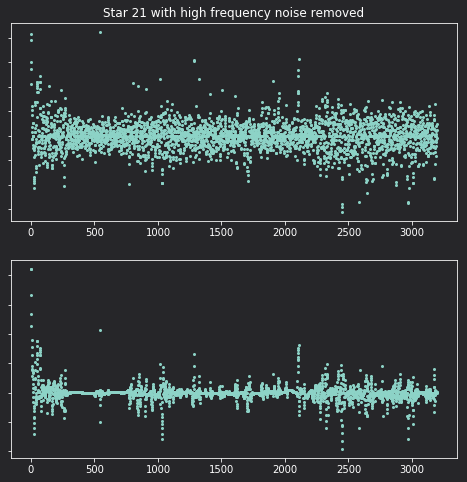

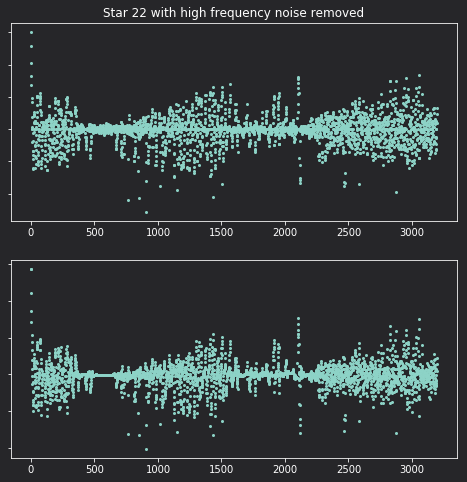

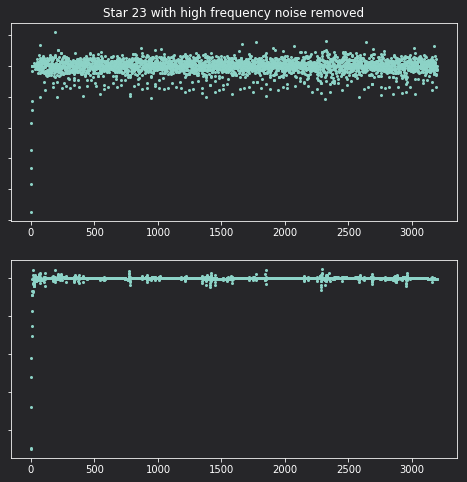

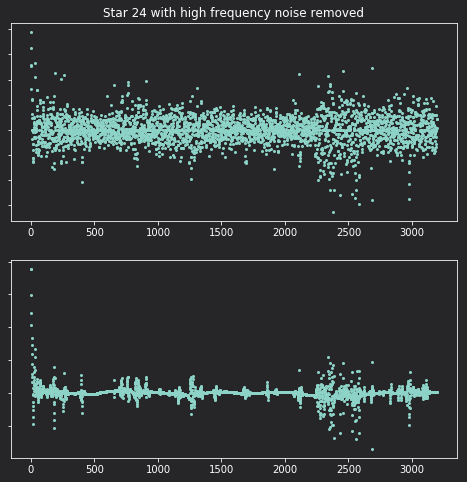

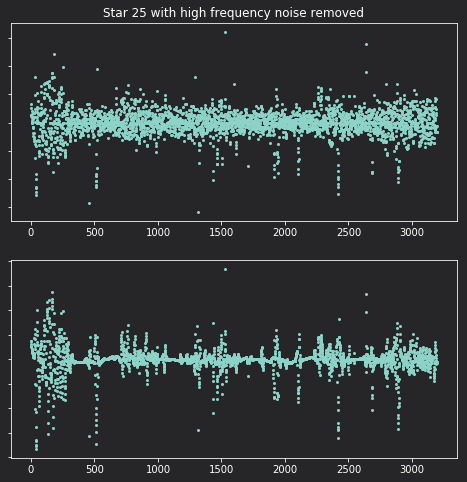

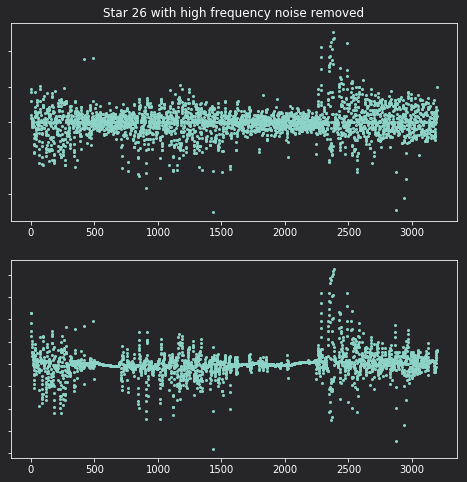

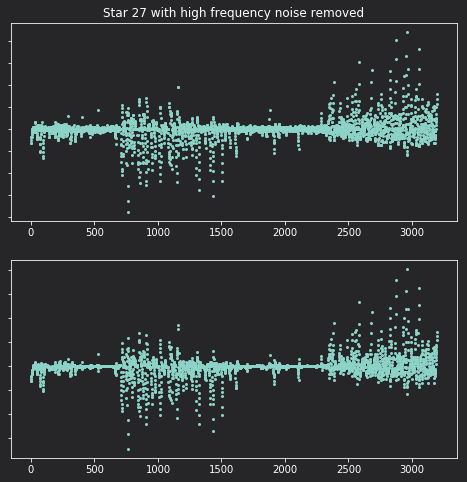

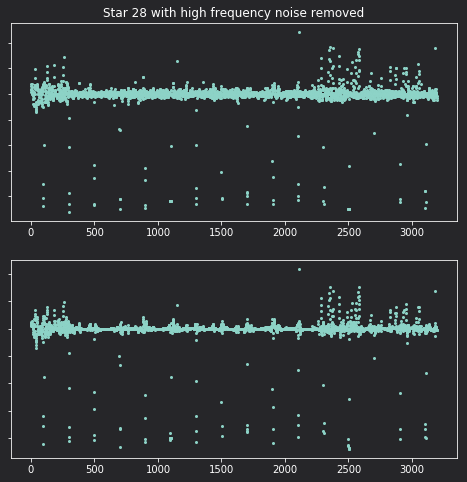

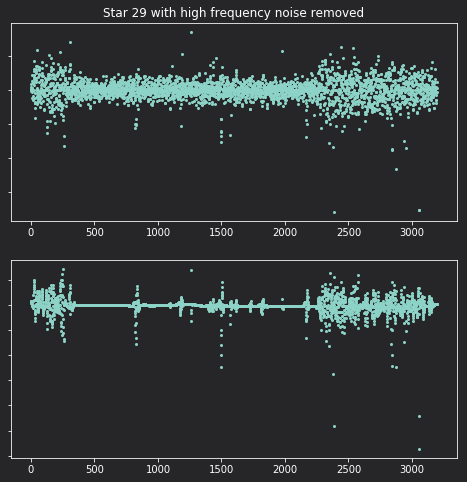

In [122]:
# for i in range(30):
for i in range(30):
    signal = data[i]
#     plot_series(signal, 'Star 0 with high frequency noise removed', mode='o')

    a,b,c = pyyawt.denoising.wden(signal, 'sqtwolog', 's', 'sln', 8, 'db2')
#     plot_series(a, '')
    plot_2(signal, a,'Star %d with high frequency noise removed'%i)
#     plot_series(signal-a, 'detrending')
#     plot_series(b, 'denoised')

In [8]:
c,l = pyyawt.dwt1d.wavedec(signal, 2, 'haar')

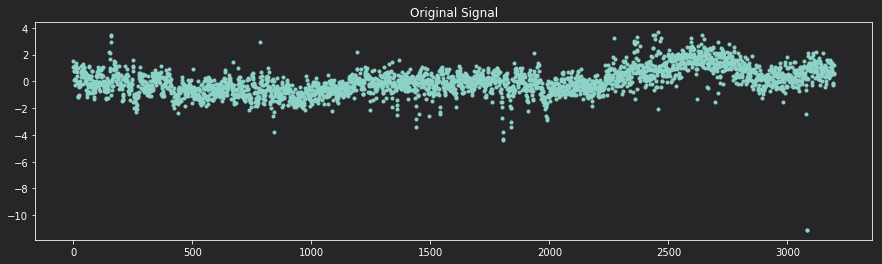

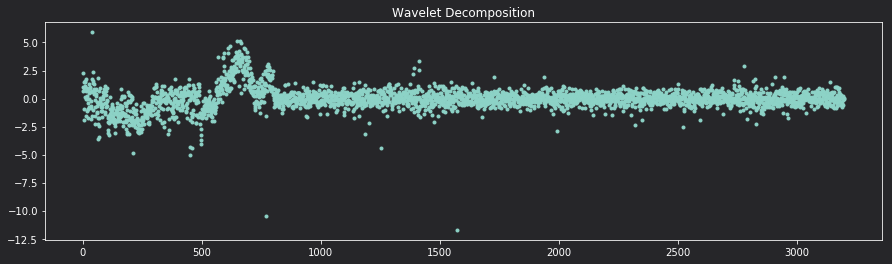

In [9]:
# plot_series(signal, 'Original Signal')
# plot_series(c,'Wavelet Decomposition')

## CWT Example

In [16]:
from pyyawt import cwt
from scipy import signal

In [2]:
index = 29
waveform = data[index]
plot_series(waveform, 'Actual Signal')

NameError: name 'data' is not defined

In [42]:
mesh, f = pywt.cwt(waveform, np.arange(1,50), 'cmor')

In [43]:
f, t =mesh.shape
f = np.arange(f)
t = np.arange(t)

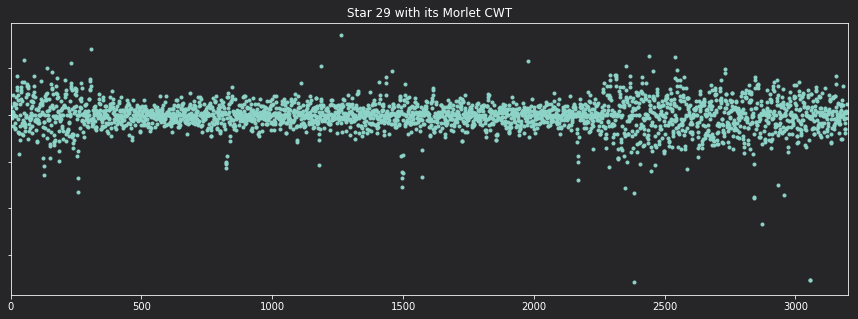

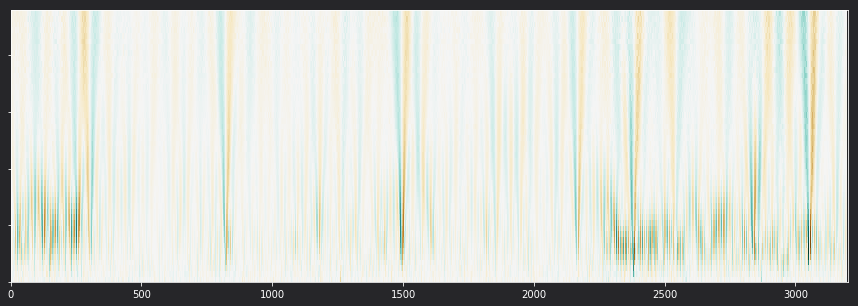

NameError: name 'plot_series' is not defined

In [47]:
plt.figure(figsize=(15,5))
plt.plot(waveform, 'o', markersize=3)
ax = plt.axes()
ax.set_xlim(left=0,right=3200)
ax.set_yticklabels([])
plt.title('Star %d with its Morlet CWT'%index)
plt.show()

plt.figure(figsize=(15,5))
ax = plt.axes()
ax.set_xlim(right=3200)
ax.set_yticklabels([])
plt.pcolormesh(t ,f, mesh.imag, cmap='BrBG_r')
plt.show()

plot_series(signal, 'as')